# <div align="center">Implement the image rotation with nearest neighbor interpolation.</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

In [111]:
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import copy

img=mpimg.imread('inputs/1.png')

angle = 45

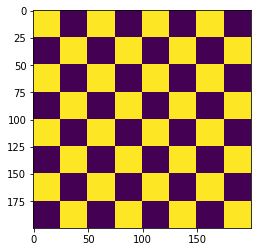

In [112]:
plt.imshow(img)

In [125]:
# def lookupNearest(x0, y0):
#     xi = numpy.abs(x-x0).argmin()
#     yi = numpy.abs(y-y0).argmin()
#     return data[yi,xi]

In [10]:
# def nn_interpolate(A, new_size):
#     """
#     Nearest Neighbor Interpolation, Step by Step
    
#     Parameters:
#         A (matrix) - initial image to interpolate
#         new_size (list or scalar) - new image shape
    
#     Returns:
#         matrix (interpolated image)
#     """
#     # get sizes
#     old_size = A.shape
    
#     # calculate row and column ratios
#     row_ratio, col_ratio = new_size[0]/old_size[0], new_size[1]/old_size[1]
    
#     # define new pixel row position i
#     new_row_positions = np.array(range(new_size[0]))+1
#     new_col_positions = np.array(range(new_size[1]))+1
    
#     # normalize new row and col positions by ratios
#     new_row_positions = new_row_positions / row_ratio
#     new_col_positions = new_col_positions / col_ratio
    
#     # apply ceil to normalized new row and col positions
#     new_row_positions = np.ceil(new_row_positions)
#     new_col_positions = np.ceil(new_col_positions)
    
#     # find how many times to repeat each element
#     row_repeats = np.array(list(Counter(new_row_positions).values()))
#     col_repeats = np.array(list(Counter(new_col_positions).values()))
    
#     # perform column-wise interpolation on the columns of the matrix
#     row_matrix = np.dstack([np.repeat(A[:, i], row_repeats) 
#                             for i in range(old_size[1])])[0]
    
#     # perform column-wise interpolation on the columns of the matrix
#     nrow, ncol = row_matrix.shape
#     final_matrix = np.stack([np.repeat(row_matrix[i, :], col_repeats)
#                              for i in range(nrow)])

#     return final_matrix
    
    
def nn_interpolate_vectorized(A, new_size):
    """
    Nearest Neighbor Interpolation
    
    Parameters:
        A (matrix) - initial image to interpolate
        new_size (list or scalar) - new image shape
    
    Returns:
        matrix (interpolated image)
    """

    old_size = A.shape
    row_ratio, col_ratio = np.array(new_size)/np.array(old_size)

    # row wise interpolation 
    row_idx = (np.ceil(range(1, 1 + int(old_size[0]*row_ratio))/row_ratio) - 1).astype(int)

    # column wise interpolation
    col_idx = (np.ceil(range(1, 1 + int(old_size[1]*col_ratio))/col_ratio) - 1).astype(int)

    final_matrix = A[:, row_idx][col_idx, :]

    return final_matrix

In [11]:
new_img = nn_interpolate_vectorized(img, [400, 280])

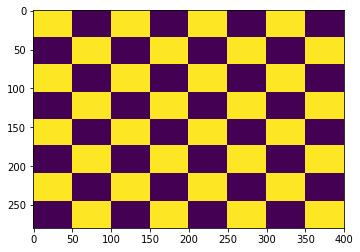

In [12]:
plt.imshow(new_img)

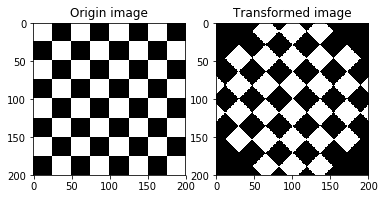

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def GetRotateMatrixWithCenter(x, y, angle):
    move_matrix = np.array(
        [
            [1, 0, x], 
            [0, 1, y], 
            [0, 0, 1]
        ])
    rotation_matrix = np.array(
        [
            [np.cos(angle), -np.sin(angle), 0], 
            [np.sin(angle),  np.cos(angle), 0], 
            [0, 0, 1]
        ])
    back_matrix = np.array(
        [
            [1, 0, -x],
            [0, 1, -y],
            [0, 0, 1]
        ])

    r = np.dot(move_matrix, rotation_matrix)
    return np.dot(r, back_matrix)

def Apply_Matrix_To_Image(matrix_to_apply, image_map):
    #takes an image and matrices and applies it.  
    x_min = 0
    y_min = 0
    x_max = image_map.shape[0]
    y_max = image_map.shape[1]

    new_image_map = np.zeros((x_max, y_max), dtype=int)

    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            curr_pixel = [x_counter,y_counter,1]

            curr_pixel = np.dot(matrix_to_apply, curr_pixel)

            if curr_pixel[0] > x_max - 1 or curr_pixel[1] > y_max - 1 or x_min > curr_pixel[0] or y_min > curr_pixel[1]:
                next
            else:
                new_image_map[x_counter][y_counter] = image_map[int(curr_pixel[0])][int(curr_pixel[1])] 

    return new_image_map


img = Image.open('inputs/1.png').convert("L")
img = np.asarray(img)

image_width = img.shape[0]
image_height = img.shape[1] 

plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Transformed image')


rotation_angle = 45
rotation_angle = np.deg2rad(rotation_angle) # degree to radian

rotation_matrix = GetRotateMatrixWithCenter(image_width / 2, image_height / 2, rotation_angle)

roteated = Apply_Matrix_To_Image(rotation_matrix, img)

plt.imshow(roteated, cmap='gray', vmin=0, vmax=255)

plt.show();